In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
#hold the city data
city_data = []

In [10]:
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1



# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | grand centre
City not found. Skipping...
Processing Record 3 of Set 1 | lingao
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | show low
Processing Record 6 of Set 1 | tanete
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | mahebourg
Processing Record 10 of Set 1 | salalah
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | guerrero negro
Processing Record 13 of Set 1 | tacuarembo
Processing Record 14 of Set 1 | vardo
Processing Record 15 of Set 1 | kuche
City not found. Skipping...
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | simplicio mendes
Processing Record 21 of Set 1 | tuatapere
Processin

Processing Record 36 of Set 4 | isangel
Processing Record 37 of Set 4 | harnosand
Processing Record 38 of Set 4 | saint-paul
Processing Record 39 of Set 4 | moron
Processing Record 40 of Set 4 | souillac
Processing Record 41 of Set 4 | urumqi
Processing Record 42 of Set 4 | colombo
Processing Record 43 of Set 4 | saleaula
City not found. Skipping...
Processing Record 44 of Set 4 | jiaohe
Processing Record 45 of Set 4 | santiago del estero
Processing Record 46 of Set 4 | benghazi
Processing Record 47 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 48 of Set 4 | piranshahr
Processing Record 49 of Set 4 | saint anthony
Processing Record 50 of Set 4 | gunjur
Processing Record 1 of Set 5 | doha
Processing Record 2 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 3 of Set 5 | kachkanar
Processing Record 4 of Set 5 | burkhala
City not found. Skipping...
Processing Record 5 of Set 5 | kangaba
Processing Record 6 of Set 5 | holme
Processing R

Processing Record 22 of Set 8 | bargal
City not found. Skipping...
Processing Record 23 of Set 8 | koslan
Processing Record 24 of Set 8 | vicuna
Processing Record 25 of Set 8 | leiyang
Processing Record 26 of Set 8 | vallenar
Processing Record 27 of Set 8 | kushiro
Processing Record 28 of Set 8 | kahului
Processing Record 29 of Set 8 | vanavara
Processing Record 30 of Set 8 | maniitsoq
Processing Record 31 of Set 8 | vredendal
Processing Record 32 of Set 8 | ocos
Processing Record 33 of Set 8 | longyearbyen
Processing Record 34 of Set 8 | saskatoon
Processing Record 35 of Set 8 | singkang
Processing Record 36 of Set 8 | zhanaozen
Processing Record 37 of Set 8 | pinkafeld
Processing Record 38 of Set 8 | carutapera
Processing Record 39 of Set 8 | skalistyy
City not found. Skipping...
Processing Record 40 of Set 8 | doba
Processing Record 41 of Set 8 | nago
Processing Record 42 of Set 8 | rungata
City not found. Skipping...
Processing Record 43 of Set 8 | kirs
Processing Record 44 of Set 

Processing Record 11 of Set 12 | rong kwang
Processing Record 12 of Set 12 | gondanglegi
Processing Record 13 of Set 12 | malibu
Processing Record 14 of Set 12 | xucheng
Processing Record 15 of Set 12 | ketchikan
Processing Record 16 of Set 12 | husavik
Processing Record 17 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 18 of Set 12 | erzin
Processing Record 19 of Set 12 | coahuayana
Processing Record 20 of Set 12 | praya
Processing Record 21 of Set 12 | marsabit
Processing Record 22 of Set 12 | bouza
Processing Record 23 of Set 12 | karasjok
Processing Record 24 of Set 12 | ayr
Processing Record 25 of Set 12 | aranos
Processing Record 26 of Set 12 | shushtar
Processing Record 27 of Set 12 | vestbygda
City not found. Skipping...
Processing Record 28 of Set 12 | tabas
Processing Record 29 of Set 12 | margate
Processing Record 30 of Set 12 | merauke
Processing Record 31 of Set 12 | labuhan
Processing Record 32 of Set 12 | cabo san lucas
Processing Record 33 of Set 12 

In [11]:
city_weather

{'coord': {'lon': -52.0986, 'lat': -32.035},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 80.71,
  'feels_like': 85.42,
  'temp_min': 80.71,
  'temp_max': 80.71,
  'pressure': 1010,
  'humidity': 78,
  'sea_level': 1010,
  'grnd_level': 1009},
 'visibility': 10000,
 'wind': {'speed': 4.85, 'deg': 200, 'gust': 6.85},
 'clouds': {'all': 100},
 'dt': 1669062410,
 'sys': {'type': 1,
  'id': 8408,
  'country': 'BR',
  'sunrise': 1669018661,
  'sunset': 1669068670},
 'timezone': -10800,
 'id': 3451138,
 'name': 'Rio Grande',
 'cod': 200}

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,15.80,92,100,3.44,CA,2022-11-21 20:10:13
1,Lingao,19.9103,109.6859,74.61,95,97,7.94,CN,2022-11-21 20:10:14
2,Port Alfred,-33.5906,26.8910,69.19,91,27,4.00,ZA,2022-11-21 20:10:15
3,Show Low,34.2542,-110.0298,56.08,25,0,5.75,US,2022-11-21 20:10:15
4,Tanete,-3.9443,119.7848,75.24,94,100,2.55,ID,2022-11-21 20:10:15
5,Mataura,-46.1927,168.8643,54.48,67,68,5.70,NZ,2022-11-21 20:10:16
6,Yellowknife,62.4560,-114.3525,28.92,93,75,5.75,CA,2022-11-21 20:10:16
7,Mahebourg,-20.4081,57.7000,74.25,74,0,8.16,MU,2022-11-21 20:10:17
8,Salalah,17.0151,54.0924,77.09,73,0,4.61,OM,2022-11-21 20:10:18
9,Chokurdakh,70.6333,147.9167,-24.27,99,100,1.39,RU,2022-11-21 20:10:18


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2022-11-21 20:10:13,69.4541,-133.0374,15.80,92,100,3.44
1,Lingao,CN,2022-11-21 20:10:14,19.9103,109.6859,74.61,95,97,7.94
2,Port Alfred,ZA,2022-11-21 20:10:15,-33.5906,26.8910,69.19,91,27,4.00
3,Show Low,US,2022-11-21 20:10:15,34.2542,-110.0298,56.08,25,0,5.75
4,Tanete,ID,2022-11-21 20:10:15,-3.9443,119.7848,75.24,94,100,2.55
5,Mataura,NZ,2022-11-21 20:10:16,-46.1927,168.8643,54.48,67,68,5.70
6,Yellowknife,CA,2022-11-21 20:10:16,62.4560,-114.3525,28.92,93,75,5.75
7,Mahebourg,MU,2022-11-21 20:10:17,-20.4081,57.7000,74.25,74,0,8.16
8,Salalah,OM,2022-11-21 20:10:18,17.0151,54.0924,77.09,73,0,4.61
9,Chokurdakh,RU,2022-11-21 20:10:18,70.6333,147.9167,-24.27,99,100,1.39


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

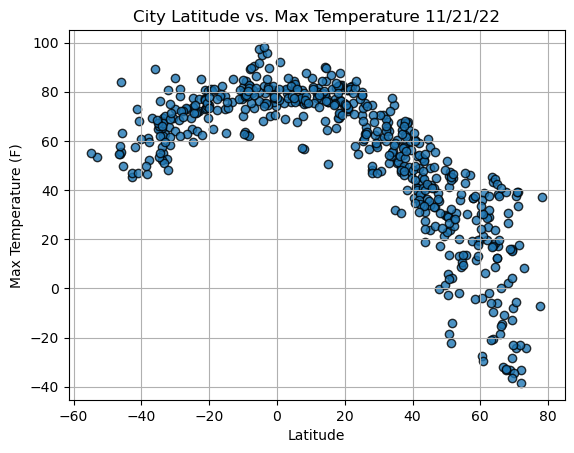

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

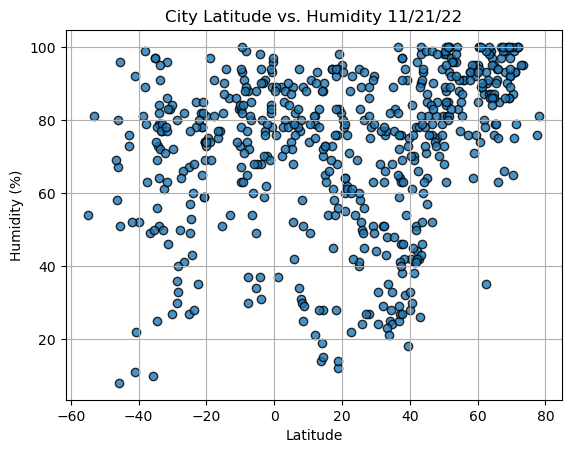

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

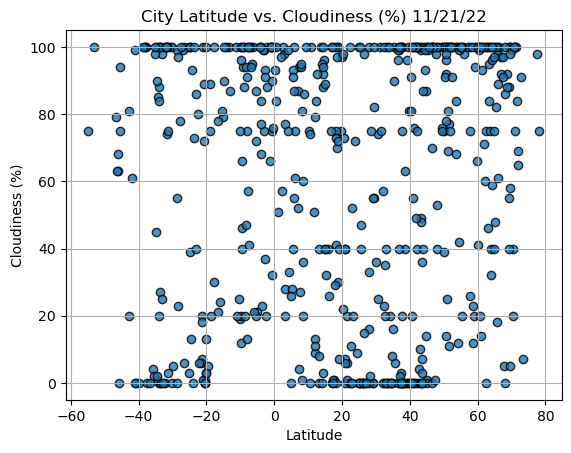

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

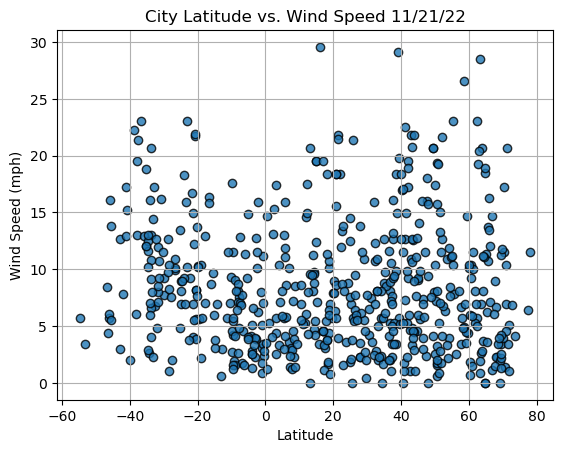

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
index13 = city_data_df.loc[13]

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

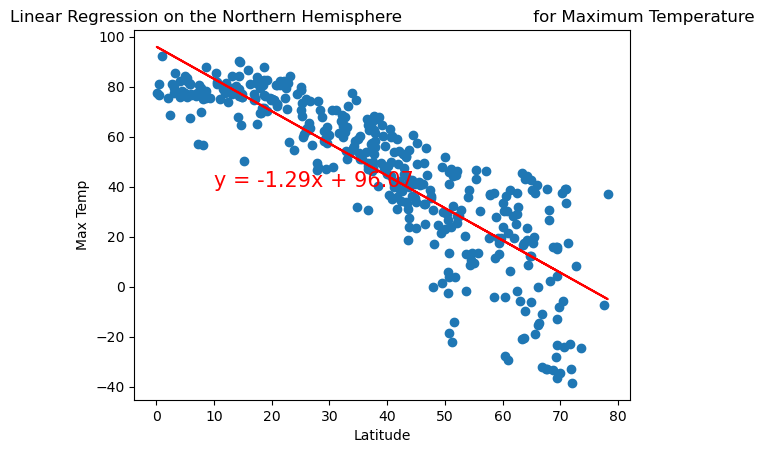

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Linear regression on the Northern Hemisphere Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

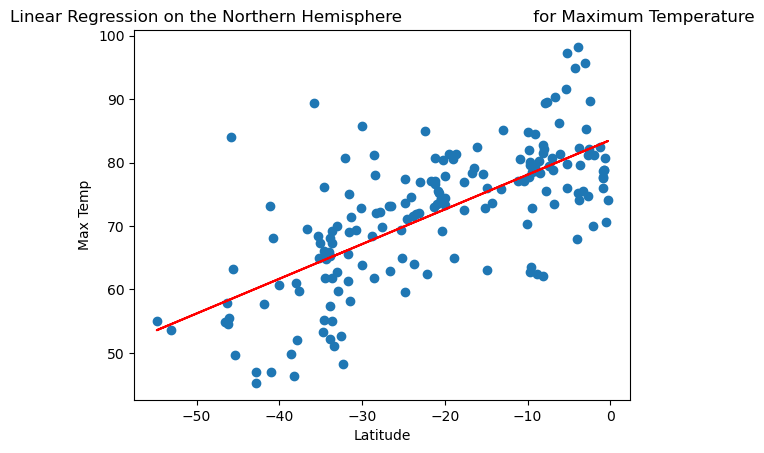

In [24]:
# Linear regression on the Southern Hemisphere Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

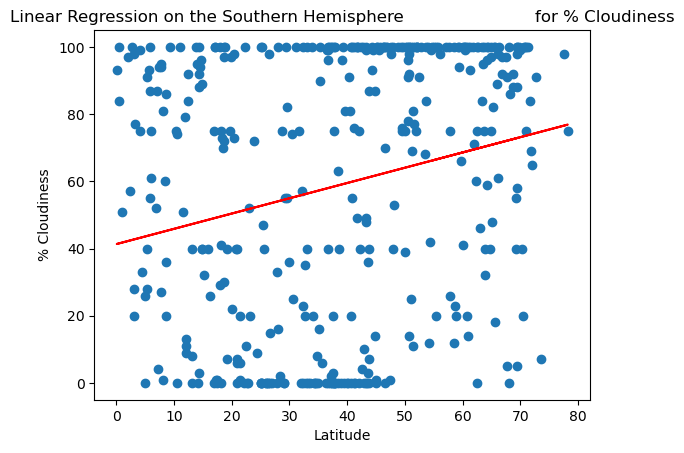

In [25]:
# Linear regression on the Northern Hemisphere for cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

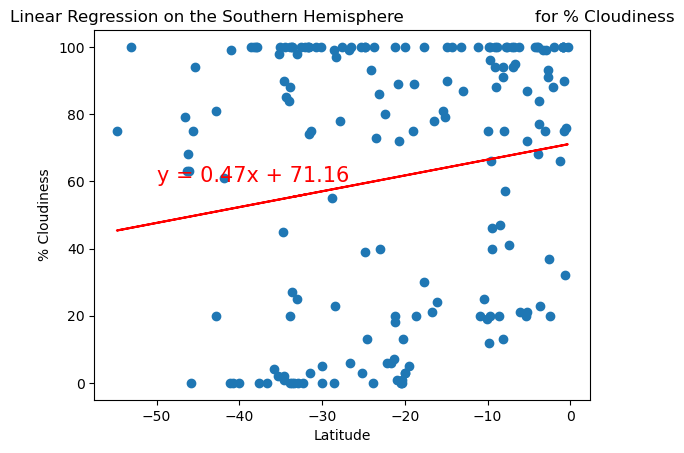

In [26]:
# Linear regression on the Southern Hemisphere for cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

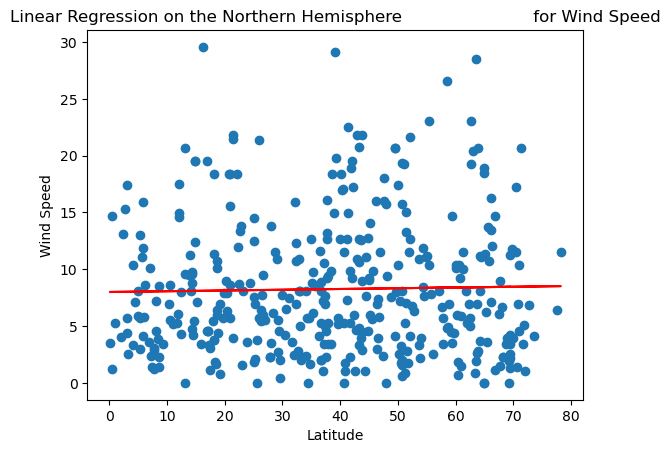

In [27]:
# Linear regression on the Northern Hemisphere for wind
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

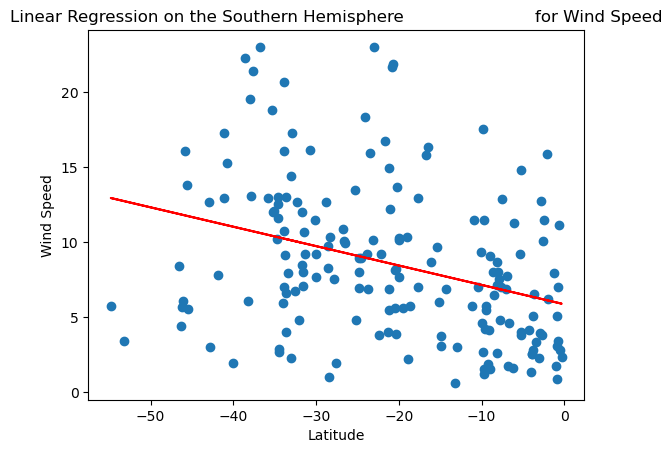

In [28]:
# Linear regression on the Southern Hemisphere for wind
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [29]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

KeyboardInterrupt: Interrupted by user

In [ ]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

In [ ]:
preferred_cities_df.isnull().sum()

In [ ]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)